## 전국일반통행도로표준데이터
- 데이터 전처리
    시도명, 지정사유, 지정연도, 도로폭, 도로차로수, 보차분리여부
    
- 결측치(column 개별 기준)
- 오류치 처리(unit의 차이)
- 이상치 처리 (iqr 사용)
- 전처리 내용 정리

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


pd_rawdata = pd.read_csv('전국일방통행도로표준데이터.csv',encoding='cp949')

columns_selection = ['시도명', '지정사유', '지정연도', '도로폭', '도로차로수', '보차분리여부']
pd_data = pd_rawdata[columns_selection]
del pd_rawdata
print(pd_data[:3])

   시도명 지정사유  지정연도  도로폭  도로차로수 보차분리여부
0  경기도  NaN   NaN  5.0    1.0      Y
1  경기도  NaN   NaN  5.0    1.0      Y
2  경기도  NaN   NaN  9.0    1.0      Y


In [85]:
# EDA : Exploratory Data Analysis
print(pd_data.columns)
print(pd_data.dtypes)

# 결측치 1567개 사유가 다양하여서 판단하기 어려움. 
# print(pd_data['지정사유'].value_counts())
# print(pd_data['지정사유'].isna().value_counts())

# 결측치 있음 1609개 정확한 연도를 알 수 없음
# print(pd_data['지정연도'].value_counts())
# print(pd_data['지정연도'].isna().value_counts())

# 결측치 없음
# print(pd_data['도로폭'].value_counts())
# print(pd_data['도로폭'].isna().value_counts())

# 이상치 있음 결측치 1개
# print(pd_data['도로차로수'].value_counts())
# print(pd_data['도로차로수'].isna().value_counts())

# 오류치 1개 있음
# print(pd_data['보차분리여부'].value_counts())
# print(pd_data['보차분리여부'].isna().value_counts())

Index(['시도명', '지정사유', '지정연도', '도로폭', '도로차로수', '보차분리여부'], dtype='object')
시도명       category
지정사유        object
지정연도       float64
도로폭        float64
도로차로수      float64
보차분리여부    category
dtype: object


In [55]:
pd_data['보차분리여부'] = pd_data['보차분리여부'].astype('category')
pd_data['시도명'] = pd_data['시도명'].astype('category')

print(pd_data.columns)
print(pd_data.dtypes)

Index(['시도명', '지정사유', '지정연도', '도로폭', '도로차로수', '보차분리여부'], dtype='object')
시도명       category
지정사유        object
지정연도       float64
도로폭        float64
도로차로수      float64
보차분리여부    category
dtype: object


In [84]:
# 결측지 확인
# print(pd_data.shape)
# print(pd_data.describe(include='all'))

for e in pd_data:
    print(e, pd_data[e].hasnans)
    if pd_data[e].hasnans==True:
        print(pd_data[e].isna().value_counts())

시도명 False
지정사유 False
지정연도 False
도로폭 False
도로차로수 False
보차분리여부 False


In [99]:
# 지정사유 사유가 없는 것이 많음
# np.NaN 는 사유없음으로 함.
# pd_data.replace({'CCTV설치여부':'Y','CCTV설치대수': np.NaN}, 1, inplace=True)
# print(pd_data.dtypes)
# print(pd_data['지정사유'])

print(pd_data['지정사유'].isna().value_counts())

filter_nan = pd_data['지정사유'] == np.NaN
pd_data.loc[filter_nan, '지정사유'] = pd_data.loc[filter_nan, '지정사유'].replace(np.NaN,'사유없음')

# pd_data.replace({'지정사유': np.NaN}, '사유없음', inplace=True)
print(pd_data['지정사유'].isna().value_counts())

print(pd_data['지정사유'])

False    2159
Name: 지정사유, dtype: int64
False    2159
Name: 지정사유, dtype: int64
0       사유없음
1       사유없음
2       사유없음
3       사유없음
4       사유없음
        ... 
2154    통행원활
2155    통행원활
2156    통행원활
2157    통행원활
2158    사유없음
Name: 지정사유, Length: 2159, dtype: object


In [58]:
# 지정연도를 알수 없는 것이 많음
# np.NaN 는 --> 0

pd_data.replace({'지정연도': np.NaN}, 0, inplace=True)
print(pd_data['지정연도'].isna().value_counts())

False    2159
Name: 지정연도, dtype: int64


In [83]:
# 도로차로수의 오류치를 평균치로 대체함.
# 1661인덱스가 60.0으로의 이상치가 나와 평균치로 대체하였다.

filter1 = pd_data['도로차로수']<30.0
df1 = pd_data['도로차로수'][filter1].mean()
# print(df1)

pd_data.replace({'도로차로수':60.0},df1, inplace=True)
pd_data.replace({'도로차로수':np.NaN}, df1, inplace=True)

print(pd_data['도로차로수'].isna().value_counts())

False    2159
Name: 도로차로수, dtype: int64


In [97]:
# 보파분리여부의 빈칸이 있음.
# 네이버 지도로 해당 주소을 확인한 결과 보차분리가 되어 있지 않아 
# 빈 값을 --> 'N'
pd_data.replace({'보차분리여부': ' '},'N', inplace=True)
print(pd_data['보차분리여부'].value_counts())

N    1658
Y     501
Name: 보차분리여부, dtype: int64


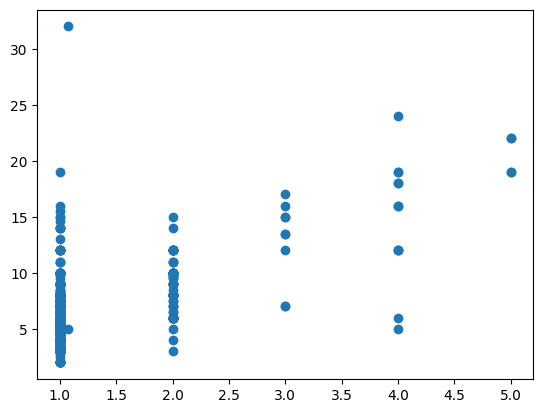

In [91]:
x = pd_data['도로차로수']
y = pd_data['도로폭']

np.corrcoef(x,y)
_,axe = plt.subplots()
axe.scatter(x,y)

## 전국일반통행도로표준데이터
- 데이터 전처리
    시도명, 지정사유, 지정연도, 도로폭, 도로차로수, 보차분리여부
    
- 결측치(column 개별 기준)
- 오류치 처리(unit의 차이)
- 이상치 처리 (iqr 사용)
- 전처리 내용 정리

### 시도명
* dtype : categoty
* value:
* 결측치 없음

### 지정사유
* dtype : object
* 결측치 없음

### 지정연도
* dtype : category
* value : 'Y', 'N'
* 결측치: 없음

### 도로폭
* dtype: np.int64
* min / max: 0 /_
* 결측치 (개)
    CCTV 설치여부 'Y' --> 1
    CCTV 설치여부 'N' --> 0

### 도로차로수
* dtype : np.float64
* min / max : 
* 오류치 (   개, 처리후 오류치 없음)
    숫자~숫자 형태의 문자열 --> 평균치 np.float64 값으로 대체
* 결측치 (   개, 처리후 결측치 없음
    전체 평균값으로 대체

### 보차분리여부
* dtype :
* value:
* 결측치: 없음